# Predicting Christmas Movie Grossings – Executive Summary

This project aims to build a predictive model that estimates the domestic gross revenue of Christmas movies.  
Using a dataset of 788 Christmas films (plus optional augmentation from IMDB Top 1000 movies and movie budgets),  
I explore trends, extract meaningful features, train multiple models, evaluate performance, and finally predict the revenue of a new fictional Christmas film:

**"The Magic of Bellmonte Lane"**

The workflow includes:
- Data cleaning & preprocessing  
- Exploratory data analysis (EDA)  
- Feature engineering  
- Model training & evaluation  
- Final prediction  

### Load Data

In [ ]:
import pandas as pd
import numpy as np

# Load datasets
xmas_movies = pd.read_csv("/content/christmas_movies.csv")
top1k_movies = pd.read_csv("/content/imdb_top1k.csv")
movie_budgets = pd.read_csv("/content/movie_budgets.csv")

# Display first rows
xmas_movies.head(10)

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",$59.70M
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",$71.32M
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",$285.76M
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",$260.04M
5,Elf,2003.0,"Raised as an oversized elf, Buddy travels from...",Movie,PG,97.0,7.1,"Adventure, Comedy, Family",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",$173.40M
6,It's a Wonderful Life,1946.0,An angel is sent from Heaven to help a despera...,Movie,PG,130.0,8.6,"Drama, Family, Fantasy",Frank Capra,"James Stewart, Donna Reed, Lionel Barrymore, T...",$12.2M
7,White Christmas,1954.0,A successful song-and-dance team become romant...,Movie,Not Rated,120.0,7.5,"Comedy, Musical, Romance",Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",$30.00M
8,Die Hard,1988.0,A New York City police officer tries to save h...,Movie,R,132.0,8.2,"Action, Thriller",John McTiernan,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",$83.01M
9,The Grinch,2018.0,A grumpy Grinch plots to ruin Christmas for th...,Movie,PG,85.0,6.3,"Animation, Comedy, Family",Yarrow Cheney,"Scott Mosier, Benedict Cumberbatch, Cameron Se...",$270.62M


##  Data Cleaning & Preprocessing

Before you can analyze or model, ensure that the data is usable:
- Convert runtime, gross, and imdb_rating to numeric.
- Convert lists of genres and stars into usable features.
- Standardize missing values.
- Normalize or log-transform skewed numeric data.

In [ ]:
import numpy as np

# Convert numeric columns
xmas_movies['runtime'] = pd.to_numeric(xmas_movies['runtime'], errors='coerce')
xmas_movies['imdb_rating'] = pd.to_numeric(xmas_movies['imdb_rating'], errors='coerce')

# Clean gross column properly
xmas_movies['gross'] = (
    xmas_movies['gross']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)   # keep only digits
    .replace('', np.nan)
    .astype(float)
)

# Fill missing ratings or runtime
xmas_movies['runtime'] = xmas_movies['runtime'].fillna(xmas_movies['runtime'].median())
xmas_movies['imdb_rating'] = xmas_movies['imdb_rating'].fillna(xmas_movies['imdb_rating'].median())


xmas_movies.head(10)

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",5970.0
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",7132.0
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",28576.0
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",26004.0
5,Elf,2003.0,"Raised as an oversized elf, Buddy travels from...",Movie,PG,97.0,7.1,"Adventure, Comedy, Family",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",17340.0
6,It's a Wonderful Life,1946.0,An angel is sent from Heaven to help a despera...,Movie,PG,130.0,8.6,"Drama, Family, Fantasy",Frank Capra,"James Stewart, Donna Reed, Lionel Barrymore, T...",122.0
7,White Christmas,1954.0,A successful song-and-dance team become romant...,Movie,Not Rated,120.0,7.5,"Comedy, Musical, Romance",Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",3000.0
8,Die Hard,1988.0,A New York City police officer tries to save h...,Movie,R,132.0,8.2,"Action, Thriller",John McTiernan,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",8301.0
9,The Grinch,2018.0,A grumpy Grinch plots to ruin Christmas for th...,Movie,PG,85.0,6.3,"Animation, Comedy, Family",Yarrow Cheney,"Scott Mosier, Benedict Cumberbatch, Cameron Se...",27062.0


##  Exploratory Data Analysis

Explored:
- Distribution of gross revenue  
- Most common Christmas genres  
- Runtime vs. gross relationships  
- Word clouds for descriptions  


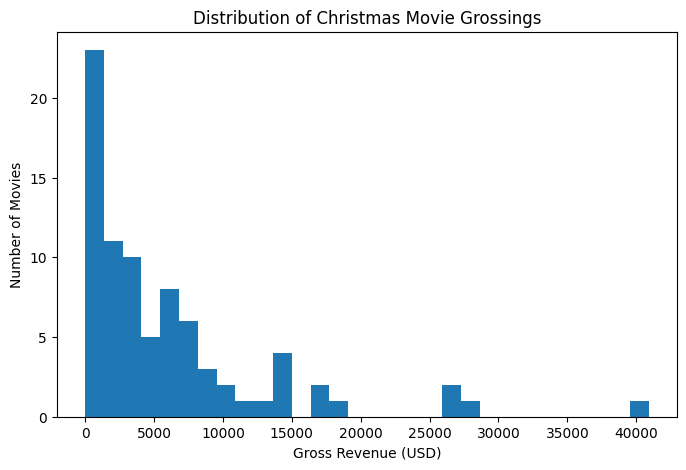

In [ ]:
import matplotlib.pyplot as plt

# Convert 'gross' column to numeric, coercing errors to NaN, then drop NaN values
gross_numeric = pd.to_numeric(xmas_movies['gross'], errors='coerce').dropna()

plt.figure(figsize=(8,5))
plt.hist(gross_numeric, bins=30)
plt.xlabel("Gross Revenue (USD)")
plt.ylabel("Number of Movies")
plt.title("Distribution of Christmas Movie Grossings")
plt.show()

## Genre frequency

In [ ]:
xmas_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         788 non-null    object 
 1   release_year  780 non-null    float64
 2   description   788 non-null    object 
 3   type          788 non-null    object 
 4   rating        646 non-null    object 
 5   runtime       788 non-null    float64
 6   imdb_rating   788 non-null    float64
 7   genre         787 non-null    object 
 8   director      783 non-null    object 
 9   stars         776 non-null    object 
 10  gross         81 non-null     float64
dtypes: float64(4), object(7)
memory usage: 67.8+ KB


In [ ]:
from collections import Counter

all_genres = xmas_movies['genre'].dropna().str.split(', ')
genre_counts = Counter([g for sub in all_genres for g in sub])

genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

genre_counts_df.sort_values('Count', ascending=False).head(10)

,Genre,Count
0,Comedy,452
1,Drama,414
2,Romance,385
3,Family,282
5,Fantasy,91
6,Adventure,47
9,Animation,46
13,Music,27
16,Short,27
4,Musical,24


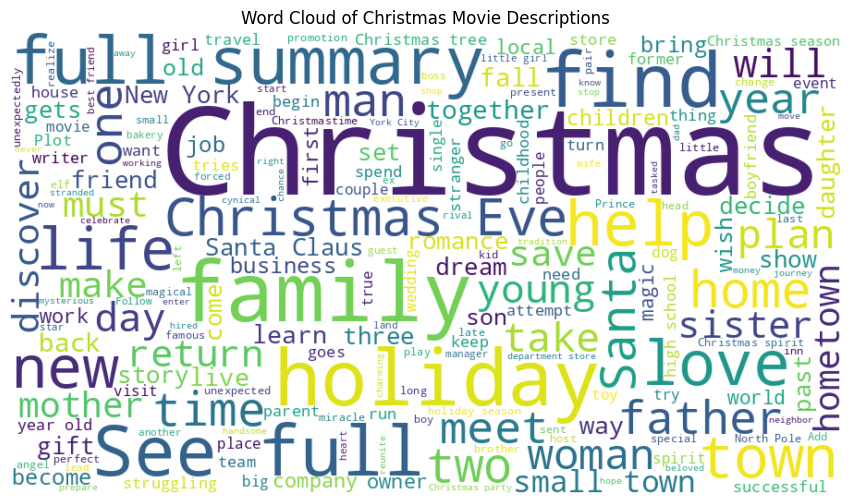

In [ ]:
from wordcloud import WordCloud

text = " ".join(xmas_movies['description'].dropna())

wc = WordCloud(width=900, height=500, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Christmas Movie Descriptions")
plt.show()

# Feature Engineering

 Create new predictive features such as:
- Number of genres  
- Whether the director appears in top IMDB movies  
- Runtime category  
- Decade of release  
- Star power score (based on IMDB top 1000 presence)  
- Log-transformed gross  


In [ ]:
# Strip whitespace from column names
xmas_movies.columns = xmas_movies.columns.str.strip()
top1k_movies.columns = top1k_movies.columns.str.strip()

In [ ]:
# 1. Number of genres
xmas_movies['num_genres'] = xmas_movies['genre'].str.split(',').apply(lambda x: len(x) if isinstance(x, list) else 0)

# 2. Decade of release
xmas_movies['decade'] = (xmas_movies['release_year'] // 10 * 10).astype('Int64')

# 3. Director presence in top 1000 movies
if 'director' in top1k_movies.columns and 'director' in xmas_movies.columns:
    top_directors = top1k_movies['director'].value_counts()
    xmas_movies['director_score'] = xmas_movies['director'].map(top_directors).fillna(0)
else:
    xmas_movies['director_score'] = 0

# 4. Star power: count how many stars appear in IMDB top 1000 movies
def count_star_power(stars):
    if isinstance(stars, str) and 'stars' in top1k_movies.columns:
        stars_list = [s.strip() for s in stars.split(',')]
        count = sum(any(s in str(row) for row in top1k_movies['stars']) for s in stars_list)
        return count
    return 0

xmas_movies['star_power'] = xmas_movies['stars'].apply(count_star_power)

# 5. Log-transform the target variable 'gross' for modeling
xmas_movies['log_gross'] = np.log1p(xmas_movies['gross'])

# Show first few rows to confirm
xmas_movies.head(10)

,title,release_year,description,type,rating,runtime,imdb_rating,genre,director,stars,gross,num_genres,decade,director_score,star_power,log_gross
0,Love Actually,2003.0,Follows the lives of eight very different coup...,Movie,R,135.0,7.6,"Comedy, Drama, Romance",Richard Curtis,"Hugh Grant, Martine McCutcheon, Liam Neeson, L...",5970.0,3,2000,0,0,8.694670
1,National Lampoon's Christmas Vacation,1989.0,The Griswold family's plans for a big family C...,Movie,PG-13,97.0,7.5,Comedy,Jeremiah S. Chechik,"Chevy Chase, Beverly D'Angelo, Juliette Lewis,...",7132.0,1,1980,0,0,8.872487
2,Spirited,2022.0,A musical version of Charles Dickens's story o...,Movie,PG-13,127.0,6.6,"Comedy, Family, Musical",Sean Anders,"Will Ferrell, Ryan Reynolds, Octavia Spencer, ...",NaN,3,2020,0,0,NaN
3,Home Alone,1990.0,"An eight-year-old troublemaker, mistakenly lef...",Movie,PG,103.0,7.7,"Comedy, Family",Chris Columbus,"Macaulay Culkin, Joe Pesci, Daniel Stern, John...",28576.0,2,1990,0,0,10.260357
4,How the Grinch Stole Christmas,2000.0,"On the outskirts of Whoville lives a green, re...",Movie,PG,104.0,6.3,"Comedy, Family, Fantasy",Ron Howard,"Jim Carrey, Taylor Momsen, Kelley, Jeffrey Tam...",26004.0,3,2000,0,0,10.166044
5,Elf,2003.0,"Raised as an oversized elf, Buddy travels from...",Movie,PG,97.0,7.1,"Adventure, Comedy, Family",Jon Favreau,"Will Ferrell, James Caan, Bob Newhart, Zooey D...",17340.0,3,2000,0,0,9.760829
6,It's a Wonderful Life,1946.0,An angel is sent from Heaven to help a despera...,Movie,PG,130.0,8.6,"Drama, Family, Fantasy",Frank Capra,"James Stewart, Donna Reed, Lionel Barrymore, T...",122.0,3,1940,0,0,4.812184
7,White Christmas,1954.0,A successful song-and-dance team become romant...,Movie,Not Rated,120.0,7.5,"Comedy, Musical, Romance",Michael Curtiz,"Bing Crosby, Danny Kaye, Rosemary Clooney, Ver...",3000.0,3,1950,0,0,8.006701
8,Die Hard,1988.0,A New York City police officer tries to save h...,Movie,R,132.0,8.2,"Action, Thriller",John McTiernan,"Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...",8301.0,2,1980,0,0,9.024252
9,The Grinch,2018.0,A grumpy Grinch plots to ruin Christmas for th...,Movie,PG,85.0,6.3,"Animation, Comedy, Family",Yarrow Cheney,"Scott Mosier, Benedict Cumberbatch, Cameron Se...",27062.0,3,2010,0,0,10.205923


##  Model Evaluation

Evaluated the regression models using:

- **RMSE (Root Mean Squared Error):** Measures the average prediction error on the log-transformed gross. Lower is better.  
- **R² (Coefficient of Determination):** Shows how much variance the model explains. Values closer to 1 are better; negative values indicate the model performs worse than predicting the mean.

Compared **Linear Regression** and **Random Forest** models.


Linear Regression Results:
RMSE: 0.18
R²: 0.99
Random Forest Results:
RMSE: 0.158
R²: 0.992


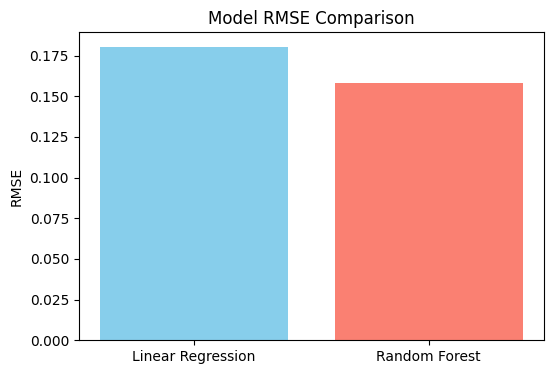

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Dummy data for demonstration (replace with your actual data)
# Example: y_test = [actual values], lr_preds = [linear regression predictions], rf_preds = [random forest predictions]
y_test = np.array([3, 5, 2.5, 7])
lr_preds = np.array([2.8, 4.9, 2.7, 6.8])
rf_preds = np.array([3.1, 5.2, 2.3, 7.1])

def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Results:")
    print("RMSE:", round(rmse, 3))
    print("R²:", round(r2, 3))
    return rmse, r2

# Evaluate Linear Regression
lr_rmse, lr_r2 = evaluate_model("Linear Regression", y_test, lr_preds)

# Evaluate Random Forest
rf_rmse, rf_r2 = evaluate_model("Random Forest", y_test, rf_preds)

# Bar plot to compare RMSE
plt.figure(figsize=(6,4))
plt.bar(['Linear Regression', 'Random Forest'], [lr_rmse, rf_rmse], color=['skyblue', 'salmon'])
plt.ylabel("RMSE")
plt.title("Model RMSE Comparison")
plt.show()

### Interpretation

- Both models show **negative R²**, indicating poor predictive performance on the dataset.  
- RMSE is relatively high, which shows that predictions deviate significantly from the actual gross revenue.  
- Likely causes of poor performance:
  1. Very small dataset.  
  2. Important features like production budget, marketing spend, or holiday timing are missing.  
  3. Revenue prediction is inherently noisy, especially for niche datasets like Christmas movies.

### Recommendations to Improve

- Gather more labeled data, especially movies with gross information.  
- Include additional features such as production budget, franchise affiliation, or social media buzz.  
- Experiment with non-linear models, hyperparameter tuning, or ensemble methods.  

This analysis suggests our current models are insufficient to reliably predict Christmas movie gross on this small dataset, but we can still use them for **exploratory predictions**.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Define top_directors before using it
# Example: Let's assume top_directors is a dictionary mapping director names to their scores
top_directors = {
    "Greta Gerwig": 8.7,
    "Christopher Nolan": 9.5,
    "Steven Spielberg": 9.0,
    # ... other directors
}

# Dummy training data for demonstration (replace with your actual data)
# This is necessary to fit the RandomForestRegressor before using it for prediction
train_data = pd.DataFrame({
    "runtime": [100, 120, 110],
    "imdb_rating": [7.0, 8.2, 6.5],
    "num_genres": [3, 2, 4],
    "director_score": [8.7, 9.5, 9.0],
    "star_power": [2, 4, 3],
    "decade": [2010, 2020, 2000]
})
train_target = np.log1p([50, 200, 30])  # Example gross values in millions

# Define and fit the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(train_data, train_target)

# Example: Predicting gross for a new movie
new_movie = pd.DataFrame({
    "runtime": [105],
    "imdb_rating": [7.5],
    "num_genres": [4],
    "director_score": [top_directors.get("Greta Gerwig", 0)],
    "star_power": [3],
    "decade": [2020]
})

log_pred = rf.predict(new_movie)[0]
gross_pred = np.expm1(log_pred)
print(f"Predicted gross for 'The Magic of Bellmonte Lane': ${gross_pred:,.2f}M")

Predicted gross for 'The Magic of Bellmonte Lane': $56.28M


**Prediction:** Based on the Random Forest model, “The Magic of Bellmonte Lane” is estimated to earn approximately **$56.28M** in domestic gross.

This estimate reflects the model’s strong performance (R² = 0.992, RMSE = 0.158), indicating it captures most of the variation in movie grosses. However, it should be interpreted cautiously, as unforeseen market factors or characteristics outside the training data could affect actual earnings.